## 机器学习

利用数据进行学习和预测的模型方法或算法

+ 有监督学习

   对特定的目标变量进行预测，并且有目标变量的数据可以利用。在监督学习Supervised learning,有一个变量可以对照，优化是一般有比较明确的目标。
   
  - 回归
  - 分类
+ 无监督学习

  无特定的目标变量，目的是探索数据内的规律
  
  - 聚类

## 分类回归的基本概念
+ 数据 $(\mathbf{x_1},y_1),(\mathbf{x_2},y_2),\ldots,(\mathbf{x_N},y_N)$
+ 有监督学习: $\hat{y}_i=f(\mathbf{x_i})$
+ 分类和回归
+ 训练样本(training data)，检验样本（test data） 
+ 评估：错误率,有多少样本被错误分类，定义为： $$\frac{1}{N}\sum_{i=1}^N{I}(f(\mathbf{x}_i)\neq y_i)$$
+ 评估：查准率，查全率
     
    + True Positive （真正, TP）被模型预测为正的正样本；  
    True Negative（真负 , TN）被模型预测为负的负样本；  
    False Positive （假正, FP）被模型预测为正的负样本；      
     False Negative（假负 , FN）被模型预测为负的正样本；
     
    + 查准率（ precision, TPR),被预测为正的样本的确是正的概率：$P = \frac{TP}{（TP + FP）}$ 
       
    +  查全率（recall） ,正的样本被识别出来的概率, $R =  \frac{TP}{TP + FN} $
 

# Scikit-Learn库

[scikit-learn: machine learning in Python — scikit-learn 0.19.1 documentation](http://scikit-learn.org/stable/index.html)
 
![](scikit_learn.png)

[基于 Python 和 Scikit-Learn 的机器学习介绍 - Python - 伯乐在线](http://python.jobbole.com/81721/)


### 逻辑回归 (logistic regression)

大多数情况下被用来解决分类问题（二元分类），但多类的分类（所谓的一对多方法）也适用。这个算法的优点是对于每一个输出的对象都有一个对应类别的概率。

### 朴素贝叶斯 （Naive Bayesian）

它也是最有名的机器学习的算法之一，它的主要任务是恢复训练样本的数据分布密度。这个方法通常在多类的分类问题上表现的很好。

### k-最近邻 (k-nearnest neighbor)

kNN（k-最近邻）方法通常用于一个更复杂分类算法的一部分。例如，我们可以用它的估计值做为一个对象的特征。有时候，一个简单的kNN算法在良好选择的特征上会有很出色的表现。当参数（主要是metrics）被设置得当，这个算法在回归问题中通常表现出最好的质量

## 决策树 (Decision Tree)

分类和回归树（CART）经常被用于这么一类问题，在这类问题中对象有可分类的特征且被用于回归和分类问题。决策树很适用于多类分类。

### Binary Logistic Regression

+ 一些设定
  1. 响应变量$Y_i$是二值的
  2. 响应变量的因子1是我们真正关心的水平
  3. 解释变量对响应取值都有影响
  4. 解释变量彼此独立，也就是说，模型应该没有或较少的共线性
  5. 解释变量对响应变量概率 $P(Y_i=1|\mathbf X)$的函数由线性关系
  6. 有较多的样本 

### 第五条
 
+ Odds 优势：$\frac{p}{1-p}$
+ 优势的对数为Logit： 

$$\text{logit } p = \log \frac{p}{1-p}$$ 

+ logistic 回归模型：
 

$$\text{logit } P(Y_i=1|   X_i) = { X}_i\beta$$ 

注意这里$\beta$是向量，对应常数项和每个$X_i$的系数项。

+ 变形为：

$$  P(Y_i=1|  X_i) =  \frac{\exp (X_i\beta)}{1+\exp(X_i\beta)}  $$ 


   

+ 其中  $\frac{\exp (x)}{1+\exp(x)}$也称为 logistic函数 或者 sigmoid函数。


### Logistic 回归的参数估计

+ 参数为 $\beta$
+ 似然函数 (下面我们用小写字母表示观测)：
   $$l(\beta)=\sum_{i=1}^n \log p_i= \sum_{i=1}^n \log  P(y_i| x_i)$$
+ 注意$y_i=1$或者 $y_i=0$，上面的公式可以写为：
    $$\begin{array}{rl}l(\beta)&=\sum_{i=1}^n \left[y_i\log  P(y_i=1| x_i)+(1-y_i) \log  P(y_i=0| x_i)\right]\\
   &= \sum_{i=1}^n \left[y_i\log  P(y_i=1| x_i)+(1-y_i) \log (1- P(y_i=1| x_i))\right]\\
    &= \sum_{i=1}^n \left[y_i\log (\frac{\exp (X_i\beta)}{1+\exp(X_i\beta)})  +(1-y_i) \log (1- (\frac{\exp (X_i\beta)}{1+\exp(X_i\beta)}))\right]\\
     &= \sum_{i=1}^n \left[y_i\log (\frac{\exp (X_i\beta)}{1+\exp(X_i\beta)})  +(1-y_i) \log (  \frac{1}{1+\exp(X_i\beta)} )\right]\\
        &= \sum_{i=1}^n \left[y_i X_i\beta -\log (1+\exp(X_i\beta) )\right]\\
    \end{array}$$
  
+  极大似然估计为：
   $$\hat \beta = \arg\max_\beta \sum_{i=1}^n \left[y_i X_i\beta -\log (1+\exp(X_i\beta) )\right] $$
 注意： 该函数是凹函数,优化相对容易收敛。
 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
%matplotlib inline

In [2]:
#ccard=sm.datasets.ccard.load_pandas().data
#ccard=pd.read_csv("http://www.stern.nyu.edu/~wgreene/Text/Edition7/TableF9-1.txt")
dta=pd.read_csv("data\TableF9-1.csv")

+ http://pages.stern.nyu.edu/~wgreene/Text/econometricanalysis.htm
+ MDR = Number of derogatory reports
+ Acc = Credit card application accepted (1=yes),
+ Age = Age in years+ 12ths of a year,
+ Income = Income, divided by 10,000 ,
+ Avgexp = Avg. monthly credit card expenditure,
+ Ownrent = OwnRent, individual owns (1) or rents (0) home.
+ Selfempl = Self employed (1=yes, 0=no)
+ 我们的目标是预测Acc，探讨影响变量

In [3]:
dta.groupby('ACC').mean()

,MDR,AGE,INCOME,AVGEXP,OWNRENT,SELFEMPL
ACC,,,,,,
0,1.037037,34.592593,3.255556,0.000000,0.333333,0.111111
1,0.109589,31.150685,3.411370,258.935753,0.369863,0.027397



+ AVGEXP 是事后的变量，ACC是不能用的
+ 下面看下各变量的情况

In [4]:
dta=dta.drop(axis=1,columns="AVGEXP")
dta.groupby('MDR').mean()

,ACC,AGE,INCOME,OWNRENT,SELFEMPL
MDR,,,,,
0,0.804878,31.658537,3.302195,0.378049,0.060976
1,0.600000,33.900000,3.575000,0.300000,0.000000
2,0.333333,31.666667,4.630000,0.000000,0.000000
3,0.000000,37.666667,4.003333,0.333333,0.000000
4,0.000000,35.000000,1.500000,0.000000,0.000000
7,0.000000,30.000000,3.000000,1.000000,0.000000


Text(0, 0.5, 'Frequency')

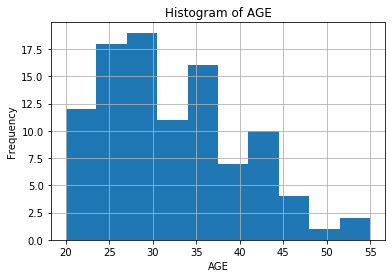

In [5]:
dta.AGE.hist()
plt.title('Histogram of AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

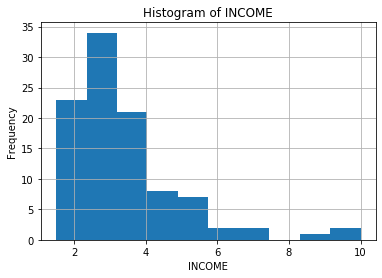

In [6]:
dta.INCOME.hist()
plt.title('Histogram of INCOME')
plt.xlabel('INCOME')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

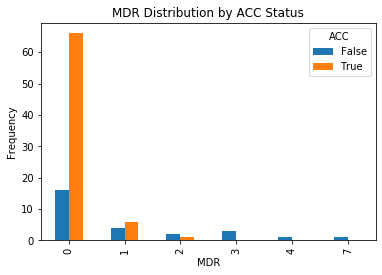

In [7]:
# barplot of MDR grouped by ACC (True or False)
pd.crosstab(dta.MDR, dta.ACC.astype(bool)).plot(kind='bar')
plt.title('MDR Distribution by ACC Status')
plt.xlabel('MDR')
plt.ylabel('Frequency')
#OWNRENT,SELFEMPL

Text(0, 0.5, 'Frequency')

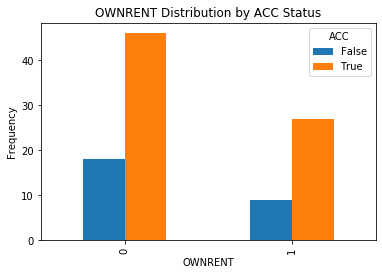

In [8]:
# barplot of OWNRENT grouped by ACC (True or False)
pd.crosstab(dta.OWNRENT, dta.ACC.astype(bool)).plot(kind='bar')
plt.title('OWNRENT Distribution by ACC Status')
plt.xlabel('OWNRENT')
plt.ylabel('Frequency')
#OWNRENT,SELFEMPL

In [9]:
dta=dta.rename(columns={"SELFEMPL ":"SELFEMPL"})

Text(0, 0.5, 'Frequency')

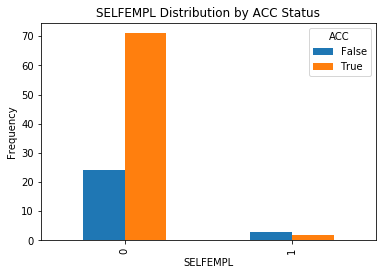

In [10]:
# barplot of SELFEMPL grouped by ACC (True or False)
pd.crosstab(dta.SELFEMPL, dta.ACC.astype(bool)).plot(kind='bar')
plt.title('SELFEMPL Distribution by ACC Status')
plt.xlabel('SELFEMPL')
plt.ylabel('Frequency') 

In [11]:
dta.columns

Index(['MDR', 'ACC', 'AGE', 'INCOME', 'OWNRENT', 'SELFEMPL'], dtype='object')

In [12]:
# create dataframes with an intercept column and dummy variables for
#  'OWNRENT' and 'SELFEMPL' 
y, X = dmatrices('ACC ~ MDR  + AGE + INCOME + C(OWNRENT) + C(SELFEMPL)',
                  dta, return_type="dataframe")
print(X.columns)

Index(['Intercept', 'C(OWNRENT)[T.1]', 'C(SELFEMPL)[T.1]', 'MDR', 'AGE',
       'INCOME'],
      dtype='object')


In [13]:
y = np.ravel(y)
#  A column-vector y was passed when a 1d array was expected.

### Logistic Reg

In [14]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(max_iter=1000)
modelres = model.fit(X, y)
print(X.columns)
print(modelres.coef_[0])


Index(['Intercept', 'C(OWNRENT)[T.1]', 'C(SELFEMPL)[T.1]', 'MDR', 'AGE',
       'INCOME'],
      dtype='object')
[-1.90031414e-05  5.84372478e-02 -1.26788837e+00 -1.18209833e+00
 -6.52369403e-02  2.44611255e-01]


In [15]:
# check the accuracy on the training set
print(modelres.score(X, y))
# what percentage application accepted?
print(y.mean())

0.78
0.73


In [16]:
data = {'y_Actual':   y,
        'y_Predicted': modelres.predict(X) 
        }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print(df)
#modelres.predict_proba(X)

    y_Actual  y_Predicted
0        1.0          1.0
1        1.0          1.0
2        1.0          1.0
3        1.0          1.0
4        1.0          1.0
..       ...          ...
95       1.0          1.0
96       1.0          1.0
97       1.0          1.0
98       1.0          1.0
99       1.0          1.0

[100 rows x 2 columns]


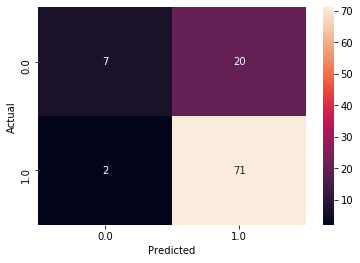

In [17]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt 
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [18]:
print(metrics.confusion_matrix(y, model.predict(X)))
print(metrics.classification_report(y, model.predict(X)))

[[ 7 20]
 [ 2 71]]
              precision    recall  f1-score   support

         0.0       0.78      0.26      0.39        27
         1.0       0.78      0.97      0.87        73

    accuracy                           0.78       100
   macro avg       0.78      0.62      0.63       100
weighted avg       0.78      0.78      0.74       100



# 决策树

http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/

http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

http://archive.ics.uci.edu/ml/datasets/Dow+Jones+Index

 

![](B03905_05_01-compressor.png)

### scikit-learn决策树结果的可视化

决策树可视化可以方便我们直观的观察模型，以及发现模型中的问题。

### 决策树可视化环境搭建
scikit-learn中决策树的可视化一般需要安装graphviz。主要包括graphviz的安装和python的graphviz插件的安装。

   + 第一步是安装graphviz。下载地址是： http://www.graphviz.org/ 。如果你是Linux系统，可以用apt-get或者yum的方法安装。如果是Windows，就在官网上下载msi文件安装。无论是Linux还是Windows，装完后都要设置环境变量，将graphviz的bin目录加到PATH中，比如我是Windows，则需要将C:\Program Files\Graphviz\bin\加入到PATH中。
    
   + 第二步是安装python的graphviz插件，执行下面的安装命令即可： pip install graphviz。(conda)
    
   + 第三步是安装python的pydotplus（或者 pydot插件），执行下面的安装命令即可：pip install pydotplus。(conda),或者 pip install pydot
    
   + 第四步是安装ipython的notebook，执行下面的安装命令即可：pip install notebook。
    
这样环境就搭建好了，有时候python会很笨，仍然找不到graphviz，这时，可以在代码里面加入这一行：
    os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
注意后面的路径是你自己的graphviz的bin目录。


## 决策树的基本介绍
+ 决策树用于分类和回归。
+ 其以一种树状的形式实现很多if then决策问题。

方法：

+ 首先用"最好"的变量构成if 条件作为树的根
+ 然后将训练集继续分割，每次使用一个变量
+ 重复上述过程直到得到满意的叶子结点。 

## 划分

+ 决策树将样本空间分割为很多小的子集。分割的目的是使得每个子集中的样本性质更加一致，即具有相同的类别或相近的目标取值。 
+ 如何分割：连续变量，离散变量

## 划分准则

+ 选择什么变量？
如果变量包含了n个变量，在根节点，或者在任何一个结点，选择哪个变量其实是很复杂的。如果只是随机的选择，结果可能会比较差。

+ 遵循什么法则
    + Information gain,信息增益，基于信息熵的准则。  
         + 熵(Entropy)用来度量一个随机变量的随机性或者说不确定性。  
         对于一个两分类问题（正负），如果所有样本都是正或者都是负，熵为0，确定性最高，熵最低；  
         如果有一半是正的，一半是负的，则熵为1，随机性最高，熵最高。  
         熵的定义为：
     $$H(X)=-\sum_{x\in \mathbb{X}}p(x)\log_2 p(x)$$     
    + Gini index，基尼指数准则
        + 记分类变量 Y的水平数为$|Y|$，$p_k=P(Y=k)$
      $$\mbox{Gini index}=\sum_{k=1}^{|Y|}\sum_{k'\neq k}p_kp_{k'}=1-\sum_{j}p_j^2$$
        + 直观反映从数据中随机抽取两个样本，其类别标记$Y$的取值不一致的概率。上述值越小，数据类别的纯度越高。

In [19]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
A=[4.8,5,5,5.2,5.2,4.7,4.8,5.4,7,6.4,6.9,5.5,6.5,5.7,6.3,4.9]
B=[3.4,3,3.4,3.5,3.4,3.2,3.2,3.4,3.2,3.2,3.1,2.3,2.8,2.8,3.3,2.4]
C=[1.9,1.6,1.6,1.5,1.4,1.6,1.6,1.5,4.7,4.5,4.9,4,4.6,4.5,4.7,3.3]
D=[0.2,0.2,0.4,0.2,0.2,0.2,0.2,0.4,1.4,1.5,1.5,1.3,1.5,1.3,1.6,1]
cols=["red"]*8+["blue"]*8
E=["positive"]*8+["negative"]*8
data=pd.DataFrame([A,B,C,D,E]).T
data.columns= ["A","B","C","D","E"]

In [20]:
data

,A,B,C,D,E
0,4.8,3.4,1.9,0.2,positive
1,5,3,1.6,0.2,positive
2,5,3.4,1.6,0.4,positive
3,5.2,3.5,1.5,0.2,positive
4,5.2,3.4,1.4,0.2,positive
5,4.7,3.2,1.6,0.2,positive
6,4.8,3.2,1.6,0.2,positive
7,5.4,3.4,1.5,0.4,positive
8,7,3.2,4.7,1.4,negative
9,6.4,3.2,4.5,1.5,negative


##  用 Gini index 示范

<div style="float:left;border:solid 1px 000;margin:15px;"><img src="figures/treedata.png"  width="400" height="520" ></div> 

+ 利用左边数据，我们使用Gini准则来生成决策树。

 $\mbox{Gini index}=1-\sum_{j}p_j^2$
+ 四个变量数据是连续型，最后一个两值变量是我们的分类目标。
+ 假设我们在这个例子根据给定的值进行了如下离散化：

A |	B |	C |	D
-----|-----|-----|-----
$\ge$ 5 |$\ge$  3.0|	$\ge$ 4.2 |	$\ge$  1.4
< 5 |	< 3.0 |	< 4.2 |	< 1.4

+ 决策树算法中，我们可以遍历可能的分割点

<div style="float:left;border:solid 1px 000;margin:15px;"><img src="figures/treedata.png"  width="400" height="820" ></div> 

计算变量A的Gini Index，首先给出列联表

 .  |	 正 |	负	 
-----|-----|----- 
$A\ge$ 5 | 5|7 
A< 5 |	 3|1

+ For Var A $\ge$ 5 & class == positive: 5/12

+ For Var A $\ge$ 5 & class == negative: 7/12
     $$gini(5,7) = 1- ( (5/12)^2 + (7/12)^2 ) = 0.4860$$
     
+ For Var A <5 & class == positive: 3/4

+ For Var A <5 & class == negative: 1/4
     $$gini(3,1) = 1- ( (3/4)^2 + (1/4)^2 ) = 0.375$$     
A 的gini index 为 两部分的加权：
$$\begin{array}{ll}gini(Target,A)=&(12/16)*(0.486)\\&+(4/16)*(0.375)={\color{red}{0.45825}}\\\end{array}$$
+ 同理，我们可以得到：
$$\begin{array}{rl}gini(Target,B)=&{\color{red}{0.3345}}\\\end{array}$$
$$\begin{array}{rl}gini(Target,C)=&{\color{red}{0.2}}\\\end{array}$$
$$\begin{array}{rl}gini(Target,D)=&{\color{red}{0.273}}\\\end{array}$$



Text(0, 0.5, 'C')

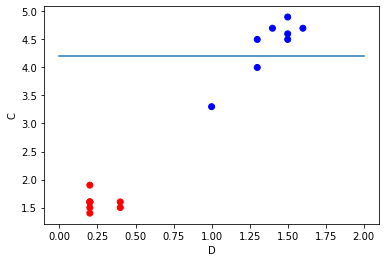

In [21]:
plt.scatter(data["D"],data["C"],c=cols) 
plt.xlim=(0,2)
plt.plot([0,2],[4.2,4.2]) 
plt.xlabel("D")
plt.ylabel("C")
#C,D都可以完全区分样本的类别。

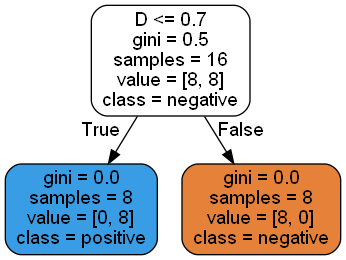

In [22]:
from sklearn import tree
import pydot
%matplotlib inline
from IPython.display import Image
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

clf = tree.DecisionTreeClassifier()
clf = clf.fit(data[["A","B","C","D"]], data[["E"]])

##注意：
dot_data = tree.export_graphviz(clf, out_file="temptree.dot", feature_names=["A","B","C","D"],
                                class_names=np.unique(data[["E"]]),
                                filled=True, rounded=True,)


dot_file=r"./temptree.dot"
graph = pydot.graph_from_dot_file(dot_file)  
Image(graph[0].create_png())
 
##

In [23]:
#预测分类,
clf.predict([[2., 2.,2.,2]])


array(['negative'], dtype=object)

In [24]:
#预测概率
clf.predict_proba([[2., 2.,2,2]])

array([[1., 0.]])

对上述样本，C和D做分割会得到不同的预测。

下面看一个复杂一点的例子。

In [25]:
from sklearn.datasets import load_iris

data = load_iris()

data.feature_names,data.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

+ 分别是花萼长度(cm)、花萼宽度(cm)、花瓣长度(cm)、花瓣宽度(cm)，
+ 山鸢尾花(Iris Setosa),变色鸢尾花(Iris Versicolor)和维吉尼亚鸢尾花(Iris Virginica)

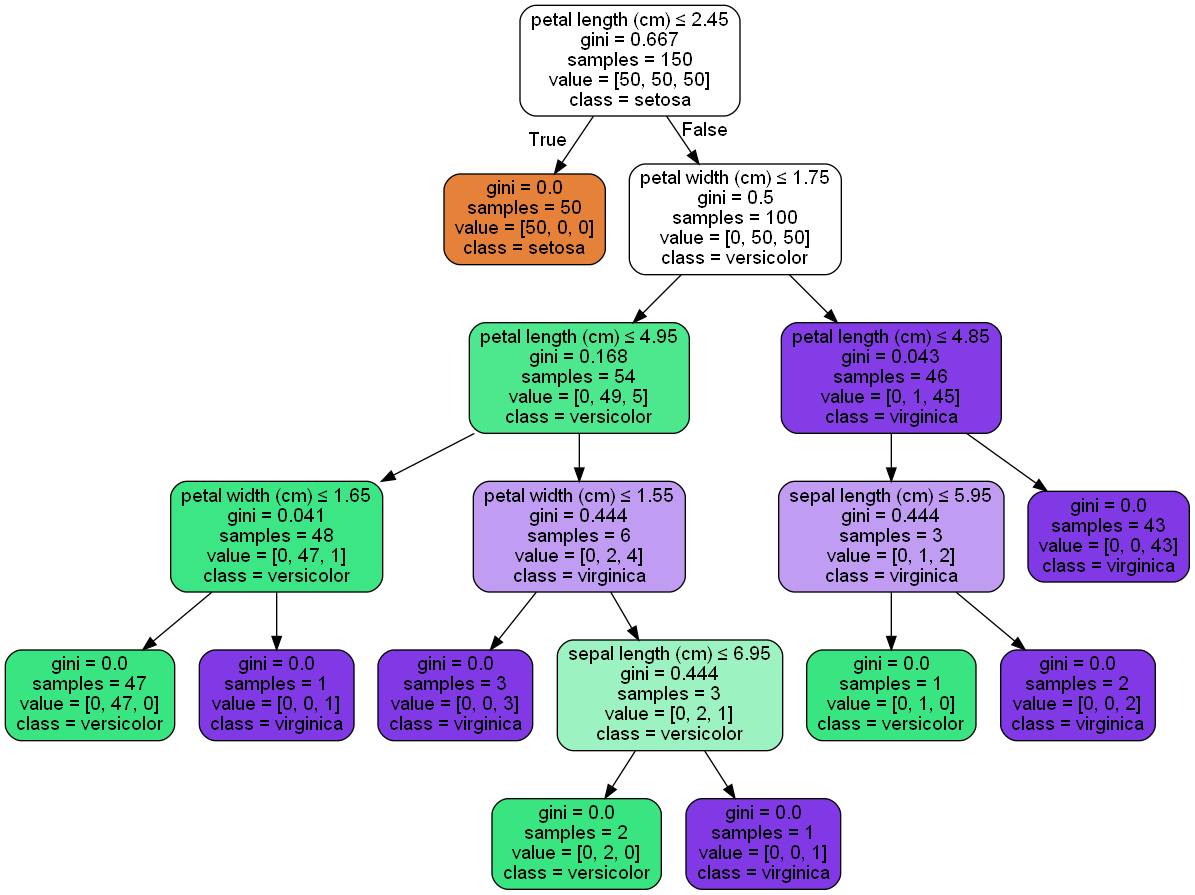

In [27]:

clf = tree.DecisionTreeClassifier()
clf = clf.fit(data.data, data.target)

dot_data = tree.export_graphviz(clf, out_file="temptree.dot",
                                feature_names=data.feature_names,
                                class_names=data.target_names,
                                filled=True, rounded=True,
                                special_characters=True)

dot_file=r'.\temptree.dot'
graph = pydot.graph_from_dot_file(dot_file)[0]  
Image(graph.create_png())
#写到pdf文件
#graph.write_pdf("iris1.pdf")

## DecisionTreeClassifier

### scikit-learn 决策树算法类库 

scikit-learn决策树算法类库内部的实现是使用了调优过的CART树算法，既可以做分类，又可以做回归。分类决策树的类对应的是DecisionTreeClassifier，而回归决策树的类对应的是DecisionTreeRegressor。两者的参数定义几乎完全相同，但是意义不全相同。下面就对DecisionTreeClassifier和DecisionTreeRegressor的重要参数做一个总结，重点比较两者参数使用的不同点和调参的注意点。



DecisionTreeClassifier和DecisionTreeRegressor重要参数调参的注意点

 
参数 |	DecisionTreeClassifier 
-----|-----
特征选择标准criterion |	可以使用"gini"或者"entropy"，前者代表基尼系数，后者代表信息增益。一般来说使用默认值基尼系数"gini"就可以了，即CART算法。除非你更喜欢类似ID3、C4.5的最优特征选择方法。 
特征划分点选择标准splitter |	可以使用"best"或者"random"。前者在特征的所有划分点中找出最优的划分点。后者是随机的在部分划分点中找局部最优的划分点。默认值"best"适合样本量不大的时候，而如果样本数据量非常大，此时决策树构建推荐"random"。
划分时考虑的最大特征数max_features |	 可以使用很多种类型的值，默认是"None"，意味着划分时考虑所有的特征数；如果是"log2"意味着划分时最多考虑 $\log_2 N$个特征；如果是"sqrt"或者"auto"意味着划分时最多考虑$\sqrt{N}$个特征。如果是整数，代表考虑的特征绝对数。如果是浮点数，代表考虑特征百分比，即考虑（百分比$\times$N）取整后的特征数。其中N为样本总特征数。一般来说，如果样本特征数不多，比如小于50，我们用默认值"None"就可以了，如果特征数非常多，我们可以灵活使用刚才描述的其它取值来控制划分时考虑的最大特征数，以控制决策树的生成时间。
决策树最大深度max_depth |	决策树的最大深度，默认可以不输入，如果不输入的话，决策树在建立子树的时候不会限制子树的深度。一般来说，数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间。
内部节点再划分所需最小样本数min_samples_split |	这个值限制了子树继续划分的条件，如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分。默认是2，如果样本量不大，不需要管这个值。如果样本量非常大，则推荐增大这个值。样本量有10万左右，建立决策树时，min_samples_split的参考值为10。
叶子节点最少样本数min_samples_leaf |	这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝。默认值是1，可以输入最少的样本数的整数，或者最少样本数占样本总数的百分比。如果样本量不大，不需要管这个值。如果样本量非常大，则推荐增大这个值。10万样本时min_samples_leaf的参考值为5。
叶子节点最小的样本权重和min_weight_fraction_leaf |	这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝。默认值是0，就是不考虑权重问题。一般来说，如果较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重。
最大叶子节点数max_leaf_nodes |	通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数。如果增加了该限制，算法会建立在最大叶子节点数内最优的决策树。如果特征不多，可以不考虑这个值，但是如果特征非常多的话，可以加以限制，具体的值可以通过交叉验证得到。
类别权重class_weight |	指定样本各类别的权重，主要是为了防止训练集某些类别的样本过多，导致训练的决策树过于偏向这些类别。这里可以自己指定各个样本的权重或者用"balanced"，如果使用"balanced"，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。当然，如果你的样本类别分布没有明显的偏倚，则可以不管这个参数，选择默认值"None"即可。  
节点划分最小不纯度min_impurity_split |	这个值限制了决策树的增长，如果某节点的不纯度（基尼系数，信息增益，均方差，绝对差）小于这个阈值，则该节点不再生成子节点，即为叶子节点 。
数据是否预排序presort |	这个值是布尔值，默认值是False即不进行预排序。一般来说，如果样本量少或者限制了一个深度很小的决策树，设置为true可以让划分点选择更加快，加快决策树的建立。如果样本量太大的话，反而没有什么好处。问题是样本量少的时候，速度本来就不慢，所以这个值一般不理它就可以了。
 